<a href="https://colab.research.google.com/github/MuhammedShiway/Graduation-Thesis/blob/main/Modified_DiffConv_%5BComplete%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> PREPARATORY STAGE </center>

In [1]:
# IMPORT PACKAGES AND MODULES

import cv2
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files

In [2]:
#EXTREMES NORMALIZER
def normalize_ext(x):
  # normalize wrt the max and min of the current image
  high = torch.max(x)
  low = torch.min(x)
  x = ((x-low) * high) / (high - low);
  return x

#NORMALIZER USING ONLY MAX
def normalize_max(x):
  high = torch.max(x)
  low = 0 - high
  x = ((x-low) * high) / (high - low);
  return x

#NORMALIZER USING DATA MAX
def normalize_data_max(x, data):
  high = torch.max(data)
  low = 0 - high
  x = ((x-low) * high) / (high - low);
  return x

#SIGMOID NORMALIZER
def normalize_sig(x):
  x = torch.sigmoid(x)
  return x

#MAX_SIGMOID NORMALIZER
def normalize_sig_max(x):
  high = torch.max(x)
  x = high / (1 + torch.exp(-x))
  return x



In [3]:
class DiffConv(nn.Module):

    def __init__(self):
        super(DiffConv, self).__init__()




    def forward(self, x, normalize):
        sizeofin = x.size()
        
        ins = sizeofin[0]
        n = sizeofin[1]
        sx = sizeofin[2]
        sy = sizeofin[3]  

        self.output = torch.zeros(ins,n*5,sx,sy)
        self.signInputs = torch.zeros(ins,n*5,sx,sy)
          
        # x = x.to(torch.int16)
        for i in range(0,ins):

            
            oM = 0
            oN = n
            
            self.output[i,oM:oN,0:sx,0:sy]= x[i].clone()
            
            oM = n
            oN = 2*n

            #area = self.output[i,oM:oN,0:sx-1,0:sy]
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(x[i,0:n,0:sx-1,0:sy])
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(-x[i,0:n,1:sx,0:sy])

            oM = 2*n
            oN = 3*n

            #area = ptr[oM:oN,0:sx,0:sy-1]
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(x[i,0:n,0:sx,0:sy-1])
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(-x[i,0:n,0:sx,1:sy])
            
            oM = 3*n
            oN = 4*n

            #area = ptr[oM:oN,0:sx-1,0:sy-1]
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,0:sx-1,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,1:sx,1:sy])

            oM = 4*n
            oN = 5*n
           
            #area = ptr[oM:oN,0:sx-1,0:sy-1]
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,1:sx,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,0:sx-1,1:sy])
            

        oM = n
        oN = 5*n

           
        #self.signInputs = self.output.sign()
        #self.signInputs[0:ins,0:n,:,:] = torch.ones(ins,n,sx,sy)
        
        #Inplace error came from the line below
        #self.output[0:ins,oM:oN,:,:] = self.output[0:ins,oM:oN].abs()

        #No more in-place error
  
        
        if normalize == 'abs':
          self.output[0:ins,oM:oN,:,:] = torch.abs(self.output[0:ins,oM:oN].clone().detach());
        elif normalize == 'ext':
          self.output[0:ins,oM:oN,:,:] = normalize_ext(self.output[0:ins,oM:oN].clone().detach() );
        elif normalize == 'max':
          self.output[0:ins,oM:oN,:,:] = normalize_max(self.output[0:ins,oM:oN].clone().detach());
        elif normalize == 'data_max':
          self.output[0:ins,oM:oN,:,:] = normalize_data_max(self.output[0:ins,oM:oN].clone().detach(), data = x);
        elif normalize == 'sig':
          self.output[0:ins,oM:oN,:,:] = normalize_sig(self.output[0:ins,oM:oN].clone().detach());
        elif normalize == 'sig_max':
          self.output[0:ins,oM:oN,:,:] = normalize_sig_max(self.output[0:ins,oM:oN].clone().detach());
        

        #print(self.output)
        self.output = self.output.to(torch.uint8)
        return self.output

In [21]:
# Convert image to tensor
transform = transforms.Compose([transforms.PILToTensor()])

# Convert tensor to image
r_transform = transforms.ToPILImage()

## <center> TEST THEM ON IMAGES </center>




In [ ]:
uploaded = files.upload()

In [52]:
ip1 = '/content/Minato 1.png'
ip2 = '/content/Minato.png'
ip3 = '/content/Hashira.jpg'

In [18]:
# # Plot the image (Load with CV2)

# img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# fig = plt.figure(figsize=(16, 6))
# imgplot = plt.imshow(img)
# plt.show()

In [ ]:
# # Load the image file (Load with PIL)
# img = Image.open(img_path)

# # Create a figure with size 16x6 inches
# fig = plt.figure(figsize=(16, 6))

# # Convert the image to a numpy array and plot it on the figure
# plt.imshow(img)

# # Show the plot
# plt.show()

In [50]:
def diff_conv(image_path, normalize = 'abs'):
  img = Image.open(image_path)
  
  img_tensor = transform(img)

  #Reshape to a 4D tensor as required by DiffConv
  img_tensor_r = img_tensor.reshape(1, img_tensor.size()[0], img_tensor.size()[1], img_tensor.size()[2])

  p = DiffConv()
  samp = p(img_tensor_r, normalize = normalize);

  r0 = r_transform(samp[0][0])
  r1 = r_transform(samp[0][3])
  r2 = r_transform(samp[0][6])
  r3 = r_transform(samp[0][9])
  r4 = r_transform(samp[0][14])

  return (img, r0, r1, r2, r3, r4)


In [53]:
a, b, c, d, e, f = diff_conv(ip2)

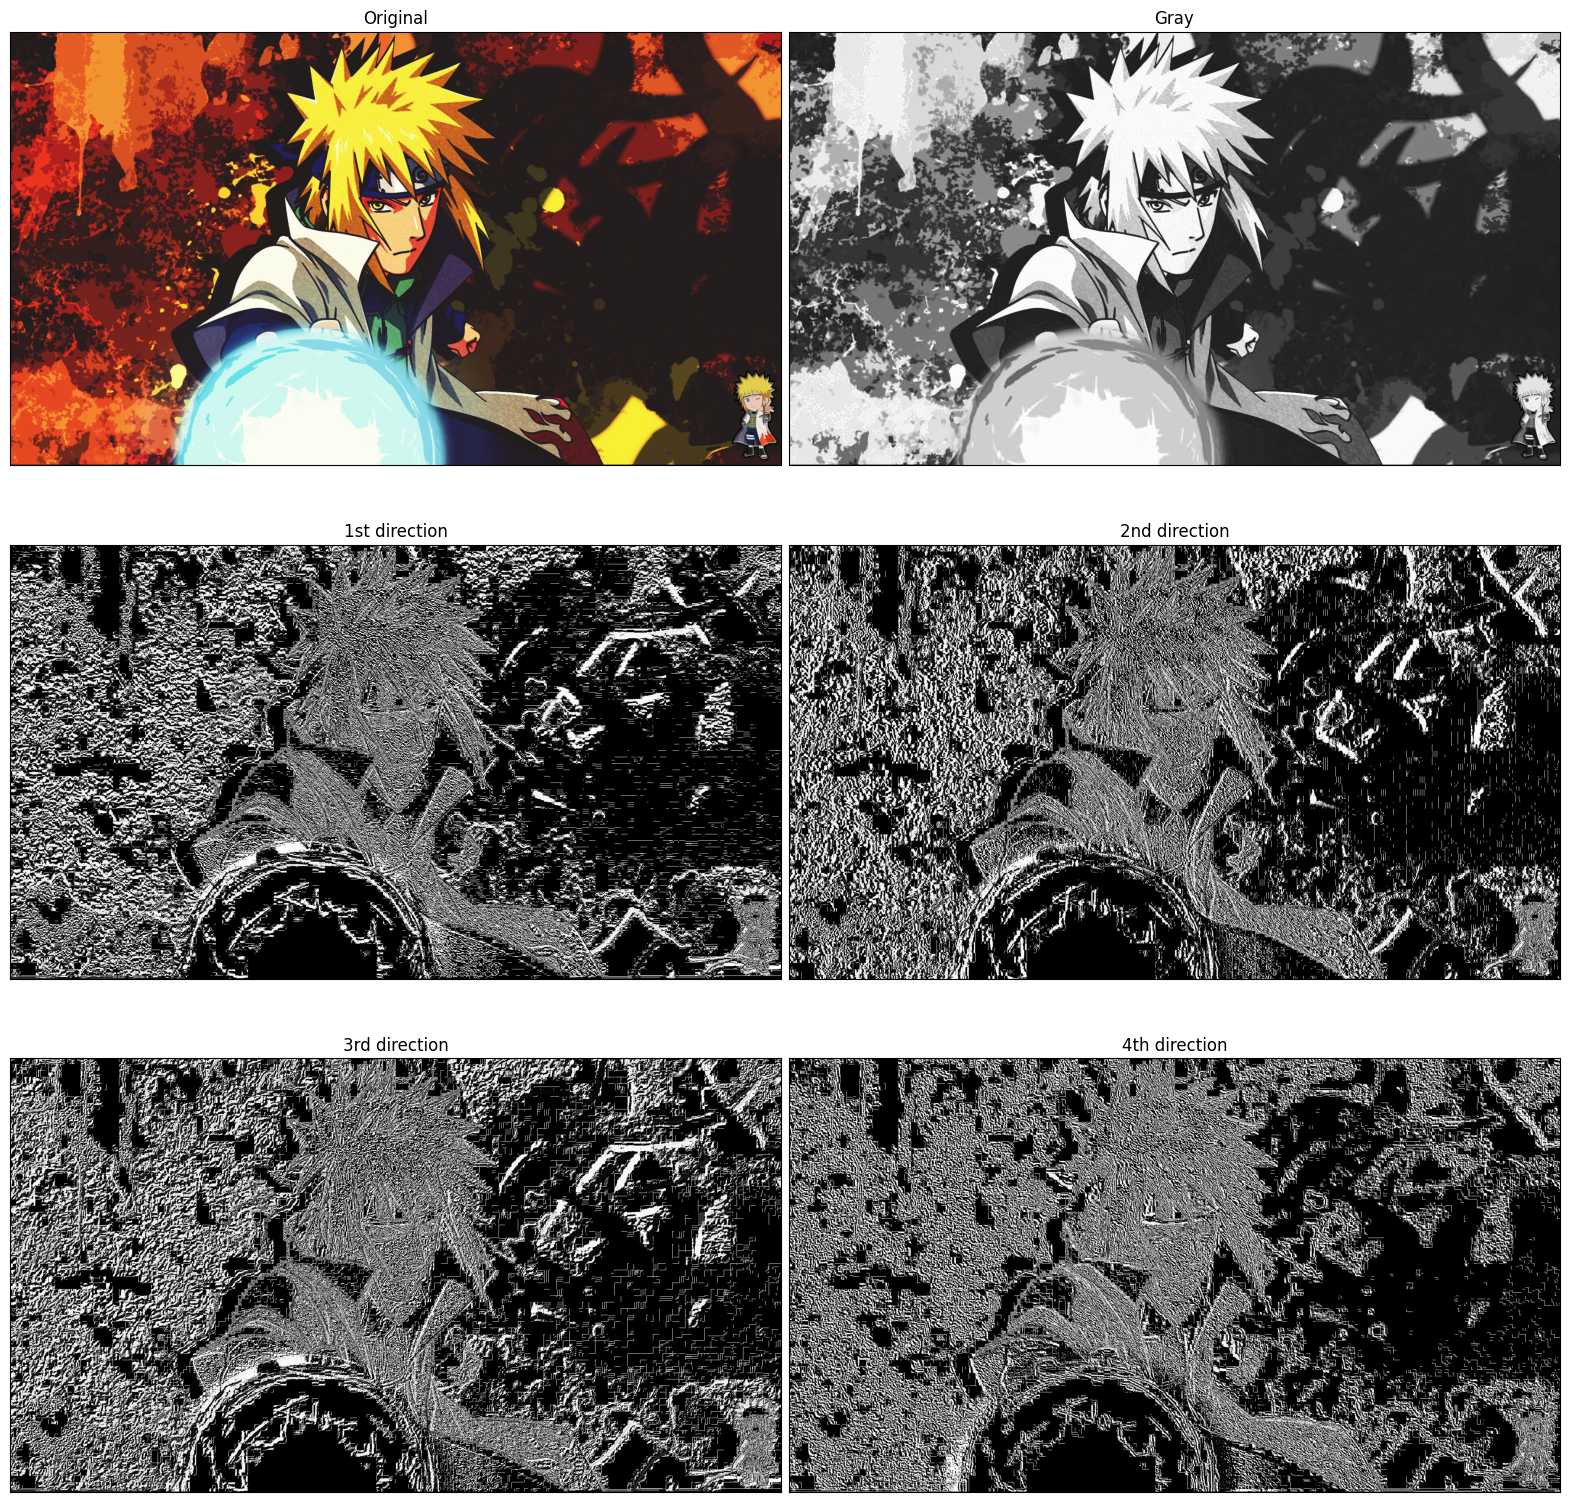

In [64]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# Title
axs[0, 0].set_title('Original')
axs[0, 1].set_title('Gray')
axs[1, 0].set_title('1st direction')
axs[1, 1].set_title('2nd direction')
axs[2, 0].set_title('3rd direction')
axs[2, 1].set_title('4th direction')

# Plot
axs[0, 0].imshow(a)
axs[0, 1].imshow(b, cmap = 'gray')
axs[1, 0].imshow(c, cmap = 'gray')
axs[1, 1].imshow(d, cmap = 'gray')
axs[2, 0].imshow(e, cmap = 'gray')
axs[2, 1].imshow(f, cmap = 'gray')

# Remove the x and y ticks from each subplot
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0)

plt.show()